# 2. Selección, Limpieza y Alistamineto de Datos

## Librerias

In [187]:
import pandas as pd
import gdown
import os

## Base de Datos Inicial

In [188]:
file_id = "1rGmaBuo0xymafMghsgGMRYPPFTtwVzp3"
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'Saber11.csv', quiet=False)
df = pd.read_csv('Saber11.csv')
os.remove("Saber11.csv")
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1rGmaBuo0xymafMghsgGMRYPPFTtwVzp3
From (redirected): https://drive.google.com/uc?id=1rGmaBuo0xymafMghsgGMRYPPFTtwVzp3&confirm=t&uuid=bd0424c7-e870-4870-b0f7-5ee983731234
To: c:\Users\felip\OneDrive\Desktop\Maestria Industrial\2025-1\Analitica\Proyecto 2\Proyecto-2\Saber11.csv
100%|██████████| 297M/297M [00:10<00:00, 29.1MB/s] 


,periodo,tipodocumento,documento,zona,bilingue,calendario,caracter,daneestablecimiento,danesede,codigodpto,...,computador,internet,lavadora,nivelingles,ingles,mate,sociales,ciencias,lectura,global
0,20132,CC,SB11201320520337,URBANO,N,A,TÉCNICO/ACADÉMICO,1.110010e+11,111001015776,11,...,Si,Si,Si,NaN,40.0,44.0,NaN,NaN,NaN,NaN
1,20132,TI,SB11201320545839,URBANO,N,A,ACADÉMICO,1.080010e+11,108001002835,8,...,No,No,Si,A1,43.0,28.0,NaN,NaN,NaN,NaN
2,20132,TI,SB11201320008819,URBANO,N,A,TÉCNICO/ACADÉMICO,1.730010e+11,173001000359,73,...,Si,Si,Si,A-,43.0,43.0,NaN,NaN,NaN,NaN
3,20132,TI,SB11201320512865,RURAL,N,A,ACADÉMICO,2.707020e+11,270702000120,70,...,No,No,No,A-,39.0,34.0,NaN,NaN,NaN,NaN
4,20132,TI,SB11201320037607,URBANO,N,A,ACADÉMICO,1.118500e+11,111850001576,11,...,Si,Si,No,NaN,43.0,34.0,NaN,NaN,NaN,NaN


## Datos Inexistentes

### Cantidad de datos vacios (NaN)

In [189]:
nan_dicc = {}
for i in df.columns:
    if df[i].isna().sum() >0:
        nan_dicc[i]=df[i].isna().sum()
nan_df =pd.DataFrame(list(nan_dicc.items()),columns=["Variable","NaN"])
nan_df.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Variable,tipodocumento,zona,bilingue,caracter,daneestablecimiento,sedeprincipal,coddeptoreside,codmcpioreside,dptoreside,sexo,...,personashogar,automovil,computador,internet,lavadora,nivelingles,sociales,ciencias,lectura,global
NaN,1,80,59591,1817,141,92688,542,542,542,135,...,442,451,449,449,474,92932,583775,583775,583775,583775


### Columnas Inexistentes

In [190]:
df.drop(["global","lectura","ciencias","sociales"],axis=1, inplace=True)
df.head()

,periodo,tipodocumento,documento,zona,bilingue,calendario,caracter,daneestablecimiento,danesede,codigodpto,...,edupadre,estrato,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate
0,20132,CC,SB11201320520337,URBANO,N,A,TÉCNICO/ACADÉMICO,1.110010e+11,111001015776,11,...,Secundaria (Bachillerato) completa,Estrato 3,Cinco,No,Si,Si,Si,NaN,40.0,44.0
1,20132,TI,SB11201320545839,URBANO,N,A,ACADÉMICO,1.080010e+11,108001002835,8,...,No sabe,Estrato 1,Cuatro,No,No,No,Si,A1,43.0,28.0
2,20132,TI,SB11201320008819,URBANO,N,A,TÉCNICO/ACADÉMICO,1.730010e+11,173001000359,73,...,Secundaria (Bachillerato) completa,Estrato 2,Cuatro,No,Si,Si,Si,A-,43.0,43.0
3,20132,TI,SB11201320512865,RURAL,N,A,ACADÉMICO,2.707020e+11,270702000120,70,...,Primaria incompleta,Estrato 1,Cinco,No,No,No,No,A-,39.0,34.0
4,20132,TI,SB11201320037607,URBANO,N,A,ACADÉMICO,1.118500e+11,111850001576,11,...,Secundaria (Bachillerato) incompleta,Estrato 2,Seis,No,Si,Si,No,NaN,43.0,34.0


### Completar Nivel de Inglés

In [191]:
df.groupby('nivelingles')['ingles'].describe()

,count,mean,std,min,25%,50%,75%,max
nivelingles,,,,,,,,
A-,275297.0,38.100005,4.710958,0.0,35.0,39.0,42.0,43.0
A1,156946.0,46.262001,2.663476,43.0,45.0,46.0,48.0,52.0
A2,29637.0,56.245706,2.458735,53.0,54.0,56.0,58.0,61.0
B+,9614.0,89.612232,5.558709,83.0,83.0,89.0,94.0,100.0
B1,19349.0,71.309887,5.733368,63.0,66.0,71.0,77.0,80.0


In [192]:
def AsginarNivelIngles(puntaje):
    if puntaje <43:
        return "A-"
    elif puntaje < 53:
        return "A1"
    elif puntaje < 63:
        return "A2"
    elif puntaje < 83:
        return "B1"
    else:
        return "B+"
    
df['nivelingles'] = df['nivelingles'].fillna(df['ingles'].apply(AsginarNivelIngles))

### Crear Nivel de Matemáticas y Corregir Incohernecias

In [193]:
df["mate"].describe()

count    583775.000000
mean         45.074148
std          10.715478
min           0.000000
25%          38.000000
50%          44.000000
75%          51.000000
max         127.000000
Name: mate, dtype: float64

In [194]:
def AsignarNivelMate(puntaje):
    if pd.isna(puntaje) or puntaje > 100:
        return None
    return min((puntaje // 10) + 1, 10)
    
df = df[df["mate"]<= 100]
df["Nivelmate"] = df["mate"].apply(AsignarNivelMate)
df

,periodo,tipodocumento,documento,zona,bilingue,calendario,caracter,daneestablecimiento,danesede,codigodpto,...,estrato,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate,Nivelmate
0,20132,CC,SB11201320520337,URBANO,N,A,TÉCNICO/ACADÉMICO,1.110010e+11,111001015776,11,...,Estrato 3,Cinco,No,Si,Si,Si,A-,40.0,44.0,5.0
1,20132,TI,SB11201320545839,URBANO,N,A,ACADÉMICO,1.080010e+11,108001002835,8,...,Estrato 1,Cuatro,No,No,No,Si,A1,43.0,28.0,3.0
2,20132,TI,SB11201320008819,URBANO,N,A,TÉCNICO/ACADÉMICO,1.730010e+11,173001000359,73,...,Estrato 2,Cuatro,No,Si,Si,Si,A-,43.0,43.0,5.0
3,20132,TI,SB11201320512865,RURAL,N,A,ACADÉMICO,2.707020e+11,270702000120,70,...,Estrato 1,Cinco,No,No,No,No,A-,39.0,34.0,4.0
4,20132,TI,SB11201320037607,URBANO,N,A,ACADÉMICO,1.118500e+11,111850001576,11,...,Estrato 2,Seis,No,Si,Si,No,A1,43.0,34.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583770,20132,TI,SB11201320391259,URBANO,N,A,TÉCNICO/ACADÉMICO,1.136570e+11,113657000107,13,...,Estrato 1,Seis,No,No,No,Si,A-,43.0,38.0,4.0
583771,20132,CC,SB11201320239983,RURAL,NaN,A,ACADÉMICO,3.051480e+11,305148000935,5,...,Estrato 4,Cinco,Si,Si,Si,Si,A1,45.0,46.0,5.0
583772,20132,CC,SB11201320277644,URBANO,N,A,ACADÉMICO,3.200010e+11,320001006112,20,...,Estrato 1,Una,No,No,Si,Si,A-,23.0,49.0,5.0
583773,20132,TI,SB11201320454077,URBANO,N,A,ACADÉMICO,1.761090e+11,176109000800,76,...,Estrato 1,Seis,No,No,No,No,B1,71.0,44.0,5.0


### Seleccionar Nacionalidad

In [195]:
df = df[df["nacionalidad"]== "COLOMBIA"]

### Seleccionar Edades Coherentes

In [196]:
df["Edad"] = 2019-(df["fechanac"].str.split("/").str[2]).astype(int)
df = df[(df['Edad'] > 14) & (df['Edad'] < 25)]
df

C:\Users\felip\AppData\Local\Temp\ipykernel_18312\1901518006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Edad"] = 2019-(df["fechanac"].str.split("/").str[2]).astype(int)


,periodo,tipodocumento,documento,zona,bilingue,calendario,caracter,daneestablecimiento,danesede,codigodpto,...,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate,Nivelmate,Edad
1,20132,TI,SB11201320545839,URBANO,N,A,ACADÉMICO,1.080010e+11,108001002835,8,...,Cuatro,No,No,No,Si,A1,43.0,28.0,3.0,23
2,20132,TI,SB11201320008819,URBANO,N,A,TÉCNICO/ACADÉMICO,1.730010e+11,173001000359,73,...,Cuatro,No,Si,Si,Si,A-,43.0,43.0,5.0,23
3,20132,TI,SB11201320512865,RURAL,N,A,ACADÉMICO,2.707020e+11,270702000120,70,...,Cinco,No,No,No,No,A-,39.0,34.0,4.0,24
4,20132,TI,SB11201320037607,URBANO,N,A,ACADÉMICO,1.118500e+11,111850001576,11,...,Seis,No,Si,Si,No,A1,43.0,34.0,4.0,23
6,20132,TI,SB11201320047502,URBANO,N,A,ACADÉMICO,3.110010e+11,311001036527,11,...,Cuatro,Si,Si,Si,Si,B1,68.0,46.0,5.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583768,20132,TI,SB11201320449654,URBANO,N,A,ACADÉMICO,1.130520e+11,113052000172,13,...,Seis,No,No,No,Si,A-,40.0,54.0,6.0,22
583769,20132,CC,SB11201320529417,RURAL,N,A,TÉCNICO,2.130060e+11,213006001975,13,...,Seis,No,No,No,Si,A-,42.0,41.0,5.0,24
583770,20132,TI,SB11201320391259,URBANO,N,A,TÉCNICO/ACADÉMICO,1.136570e+11,113657000107,13,...,Seis,No,No,No,Si,A-,43.0,38.0,4.0,23
583773,20132,TI,SB11201320454077,URBANO,N,A,ACADÉMICO,1.761090e+11,176109000800,76,...,Seis,No,No,No,No,B1,71.0,44.0,5.0,24


### Descartar Precidiarios

In [197]:
df.groupby("libertad").describe()

periodo                                                     \
             count          mean       std      min      25%      50%   
libertad                                                                
N         468986.0  20131.950734  0.216423  20131.0  20132.0  20132.0   
S             61.0  20132.000000  0.000000  20132.0  20132.0  20132.0   

                           daneestablecimiento                ... Nivelmate  \
              75%      max               count          mean  ...       75%   
libertad                                                      ...             
N         20132.0  20132.0            468929.0  2.088246e+11  ...       6.0   
S         20132.0  20132.0                61.0  2.628207e+11  ...       5.0   

                    Edad                                                     
           max     count       mean       std   min   25%   50%   75%   max  
libertad                                                                     
N         10.0  468986.0  22.945312  0.772751  16.0  22.0  23.0  23.0  24.0  
S          7.0      61.0  23.540984  0.696988  21.0  23.0  24.0  24.0  24.0  

[2 rows x 112 columns]

In [198]:
df = df[df["libertad"]=="N"]

### Columnas Innecesarias

In [199]:
df.drop(["documento","daneestablecimiento","danesede","codigodpto","codigomcpio","codigoicfes","nombreest",
         "nombresede","sedeprincipal","coddptopres","codmcpiopres","coddeptoreside","codmcpioreside","dptopres",
         "investigacion","tipoestudiante","libertad","mcpiopres","mcpioreside","mcpio", "bilingue","paisreside","nacionalidad"],
        axis=1, inplace=True)
df.head()

C:\Users\felip\AppData\Local\Temp\ipykernel_18312\626980104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["documento","daneestablecimiento","danesede","codigodpto","codigomcpio","codigoicfes","nombreest",


,periodo,tipodocumento,zona,calendario,caracter,dpto,genero,jornada,naturaleza,dptoreside,...,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate,Nivelmate,Edad
1,20132,TI,URBANO,A,ACADÉMICO,ATLANTICO,MIXTO,MAÑANA,OFICIAL,ATLANTICO,...,Cuatro,No,No,No,Si,A1,43.0,28.0,3.0,23
2,20132,TI,URBANO,A,TÉCNICO/ACADÉMICO,TOLIMA,MIXTO,COMPLETA,OFICIAL,TOLIMA,...,Cuatro,No,Si,Si,Si,A-,43.0,43.0,5.0,23
3,20132,TI,RURAL,A,ACADÉMICO,SUCRE,MIXTO,TARDE,OFICIAL,SUCRE,...,Cinco,No,No,No,No,A-,39.0,34.0,4.0,24
4,20132,TI,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,TARDE,OFICIAL,BOGOTÁ,...,Seis,No,Si,Si,No,A1,43.0,34.0,4.0,23
6,20132,TI,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,BOGOTÁ,...,Cuatro,Si,Si,Si,Si,B1,68.0,46.0,5.0,22


## Nuevas Bases de Datos

### Base de Datos Matemáticas

In [200]:
df_Mate = df.copy()
df_Mate.drop(["zona","calendario","caracter","dpto","genero","jornada","naturaleza"],axis=1, inplace=True)
df_Mate = df_Mate.dropna()

#### Datos que no proporcionan información

In [201]:
df_Mate = df_Mate[df_Mate["edumadre"] != "No sabe"]
df_Mate = df_Mate[df_Mate["edupadre"] != "No sabe"]
df_Mate = df_Mate.dropna()
df_Mate

,periodo,tipodocumento,dptoreside,fechanac,sexo,cuartoshogar,edumadre,edupadre,estrato,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate,Nivelmate,Edad
2,20132,TI,TOLIMA,06/12/1996,M,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,Cuatro,No,Si,Si,Si,A-,43.0,43.0,5.0,23
3,20132,TI,SUCRE,27/08/1995,M,Uno,Primaria completa,Primaria incompleta,Estrato 1,Cinco,No,No,No,No,A-,39.0,34.0,4.0,24
4,20132,TI,BOGOTÁ,18/03/1996,M,Dos,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,Estrato 2,Seis,No,Si,Si,No,A1,43.0,34.0,4.0,23
6,20132,TI,BOGOTÁ,29/04/1997,M,Tres,Educación profesional completa,Técnica o tecnológica completa,Estrato 3,Cuatro,Si,Si,Si,Si,B1,68.0,46.0,5.0,22
7,20132,TI,HUILA,26/12/1995,M,Cuatro,Primaria incompleta,Primaria incompleta,Estrato 2,Cuatro,No,No,No,No,A1,45.0,43.0,5.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583768,20132,TI,BOLIVAR,21/03/1997,M,Tres,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Estrato 1,Seis,No,No,No,Si,A-,40.0,54.0,6.0,22
583769,20132,CC,BOLIVAR,12/03/1995,M,Dos,Primaria completa,Primaria completa,Estrato 1,Seis,No,No,No,Si,A-,42.0,41.0,5.0,24
583770,20132,TI,BOLIVAR,22/10/1996,F,Dos,Secundaria (Bachillerato) completa,Ninguno,Estrato 1,Seis,No,No,No,Si,A-,43.0,38.0,4.0,23
583773,20132,TI,VALLE,05/06/1995,M,Dos,Primaria incompleta,Primaria incompleta,Estrato 1,Seis,No,No,No,No,B1,71.0,44.0,5.0,24


### Mapeo Educación

In [202]:
mapa_educacion = {
    'Ninguno': 'Ninguno',
    'Primaria incompleta': 'Primaria inc.',
    'Primaria completa': 'Primaria',
    'Secundaria (Bachillerato) incompleta': 'Secundaria inc.',
    'Secundaria (Bachillerato) completa': 'Secundaria',
    'Técnica o tecnológica incompleta': 'Técnica/tecn. inc.',
    'Técnica o tecnológica completa': 'Técnica/tecn.',
    'Educación profesional incompleta': 'Profesional inc.',
    'Educación profesional completa': 'Profesional',
    'Postgrado': 'Postgrado'
}

df_Mate['edupadre'] = df_Mate['edupadre'].map(mapa_educacion)
df_Mate['edumadre'] = df_Mate['edumadre'].map(mapa_educacion)

#### Guardar Base de Datos

In [203]:
#df_Mate.to_csv("SaberMate.csv", index = False)

### Base de Datos Inglés

In [204]:
df_Ingles = df.copy()
df_Ingles.drop(["tipodocumento","dptoreside","fechanac","sexo","cuartoshogar","edumadre","edupadre","estrato","personashogar","automovil",
                "computador","internet","lavadora"],axis=1, inplace=True)
df_Ingles

,periodo,zona,calendario,caracter,dpto,genero,jornada,naturaleza,nivelingles,ingles,mate,Nivelmate,Edad
1,20132,URBANO,A,ACADÉMICO,ATLANTICO,MIXTO,MAÑANA,OFICIAL,A1,43.0,28.0,3.0,23
2,20132,URBANO,A,TÉCNICO/ACADÉMICO,TOLIMA,MIXTO,COMPLETA,OFICIAL,A-,43.0,43.0,5.0,23
3,20132,RURAL,A,ACADÉMICO,SUCRE,MIXTO,TARDE,OFICIAL,A-,39.0,34.0,4.0,24
4,20132,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,TARDE,OFICIAL,A1,43.0,34.0,4.0,23
6,20132,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,B1,68.0,46.0,5.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583768,20132,URBANO,A,ACADÉMICO,BOLIVAR,MIXTO,TARDE,OFICIAL,A-,40.0,54.0,6.0,22
583769,20132,RURAL,A,TÉCNICO,BOLIVAR,MIXTO,MAÑANA,OFICIAL,A-,42.0,41.0,5.0,24
583770,20132,URBANO,A,TÉCNICO/ACADÉMICO,BOLIVAR,MIXTO,MAÑANA,OFICIAL,A-,43.0,38.0,4.0,23
583773,20132,URBANO,A,ACADÉMICO,VALLE,MIXTO,MAÑANA,OFICIAL,B1,71.0,44.0,5.0,24


#### Datos que no proporcionan información

In [205]:
df_Ingles = df_Ingles.dropna()
df_Ingles

,periodo,zona,calendario,caracter,dpto,genero,jornada,naturaleza,nivelingles,ingles,mate,Nivelmate,Edad
1,20132,URBANO,A,ACADÉMICO,ATLANTICO,MIXTO,MAÑANA,OFICIAL,A1,43.0,28.0,3.0,23
2,20132,URBANO,A,TÉCNICO/ACADÉMICO,TOLIMA,MIXTO,COMPLETA,OFICIAL,A-,43.0,43.0,5.0,23
3,20132,RURAL,A,ACADÉMICO,SUCRE,MIXTO,TARDE,OFICIAL,A-,39.0,34.0,4.0,24
4,20132,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,TARDE,OFICIAL,A1,43.0,34.0,4.0,23
6,20132,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,B1,68.0,46.0,5.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583768,20132,URBANO,A,ACADÉMICO,BOLIVAR,MIXTO,TARDE,OFICIAL,A-,40.0,54.0,6.0,22
583769,20132,RURAL,A,TÉCNICO,BOLIVAR,MIXTO,MAÑANA,OFICIAL,A-,42.0,41.0,5.0,24
583770,20132,URBANO,A,TÉCNICO/ACADÉMICO,BOLIVAR,MIXTO,MAÑANA,OFICIAL,A-,43.0,38.0,4.0,23
583773,20132,URBANO,A,ACADÉMICO,VALLE,MIXTO,MAÑANA,OFICIAL,B1,71.0,44.0,5.0,24


#### Guardar Base de Datos

In [206]:
#df_Ingles.to_csv("SaberIngles.csv", index = False)

# 3. Exploración de Datos

## Librerias

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

## Primera Base de Datos

### Analisis de Datos - General

In [208]:
df_Mate["mate"].describe()

count    445407.000000
mean         45.976563
std          10.760034
min           0.000000
25%          40.000000
50%          44.000000
75%          52.000000
max         100.000000
Name: mate, dtype: float64

In [209]:
df_Mate.groupby("Nivelmate").describe()

periodo                                                     \
              count          mean       std      min      25%      50%   
Nivelmate                                                                
1.0           218.0  20131.894495  0.307910  20131.0  20132.0  20132.0   
2.0          1484.0  20131.942722  0.232451  20131.0  20132.0  20132.0   
3.0         23189.0  20131.970503  0.169198  20131.0  20132.0  20132.0   
4.0         83351.0  20131.962652  0.189614  20131.0  20132.0  20132.0   
5.0        193867.0  20131.967875  0.176333  20131.0  20132.0  20132.0   
6.0         95556.0  20131.949391  0.219199  20131.0  20132.0  20132.0   
7.0         34358.0  20131.893125  0.308958  20131.0  20132.0  20132.0   
8.0         10542.0  20131.813982  0.389140  20131.0  20132.0  20132.0   
9.0          2220.0  20131.630180  0.482865  20131.0  20131.0  20132.0   
10.0          622.0  20131.572347  0.495136  20131.0  20131.0  20132.0   

                               ingles             ...  mate             Edad  \
               75%      max     count       mean  ...   75%    max     count   
Nivelmate                                         ...                          
1.0        20132.0  20132.0     218.0  32.353211  ...   0.0    7.0     218.0   
2.0        20132.0  20132.0    1484.0  40.108491  ...  13.0   18.0    1484.0   
3.0        20132.0  20132.0   23189.0  40.690025  ...  29.0   29.0   23189.0   
4.0        20132.0  20132.0   83351.0  41.317825  ...  38.0   39.0   83351.0   
5.0        20132.0  20132.0  193867.0  43.054156  ...  46.0   49.0  193867.0   
6.0        20132.0  20132.0   95556.0  48.176472  ...  55.0   59.0   95556.0   
7.0        20132.0  20132.0   34358.0  58.209675  ...  65.0   69.0   34358.0   
8.0        20132.0  20132.0   10542.0  69.515936  ...  75.0   79.0   10542.0   
9.0        20132.0  20132.0    2220.0  77.984685  ...  88.0   89.0    2220.0   
10.0       20132.0  20132.0     622.0  82.024116  ...  98.0  100.0     622.0   

                                                              
                mean       std   min   25%   50%   75%   max  
Nivelmate                                                     
1.0        23.270642  0.782976  21.0  23.0  23.0  24.0  24.0  
2.0        23.062668  0.802546  20.0  23.0  23.0  24.0  24.0  
3.0        23.058174  0.781573  17.0  23.0  23.0  24.0  24.0  
4.0        23.028302  0.775821  17.0  23.0  23.0  24.0  24.0  
5.0        22.965843  0.772971  16.0  22.0  23.0  24.0  24.0  
6.0        22.850381  0.762909  16.0  22.0  23.0  23.0  24.0  
7.0        22.777519  0.733709  17.0  22.0  23.0  23.0  24.0  
8.0        22.829729  0.750509  17.0  22.0  23.0  23.0  24.0  
9.0        22.974324  0.787331  17.0  22.0  23.0  24.0  24.0  
10.0       23.038585  0.797615  20.0  23.0  23.0  24.0  24.0  

[10 rows x 32 columns]

### Analisis de Datos - Autocorrelación

In [210]:
VCramerMate = {}
for i in df_Mate.columns:
    if i != "Nivelmate" and i != "ingles" and i != "mate":
        tabla = pd.crosstab(df_Mate['Nivelmate'], df_Mate[i])
        chi2, p, dof, expected = chi2_contingency(tabla)
        n = tabla.sum().sum()
        phi2 = chi2 / n
        r, k = tabla.shape
        v_cramer = np.sqrt(phi2 / min(k - 1, r - 1))
        VCramerMate[i] =v_cramer

VCramerMate = pd.DataFrame.from_dict(VCramerMate, orient='index', columns=['V de Cramer']).reset_index()
VCramerMate.rename(columns={'index': 'Variable'}, inplace=True)
VCramerMate['V de Cramer'] = VCramerMate['V de Cramer'].astype(float).round(3)
VCramerMate = VCramerMate.sort_values(by='V de Cramer', ascending=False).reset_index(drop=True)

VCramerMate.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Variable,nivelingles,automovil,internet,computador,periodo,estrato,lavadora,sexo,edupadre,edumadre,fechanac,dptoreside,Edad,personashogar,cuartoshogar,tipodocumento
V de Cramer,0.311,0.236,0.227,0.215,0.185,0.175,0.152,0.148,0.123,0.12,0.082,0.059,0.04,0.038,0.028,0.025


### Graficos

#### Box plots

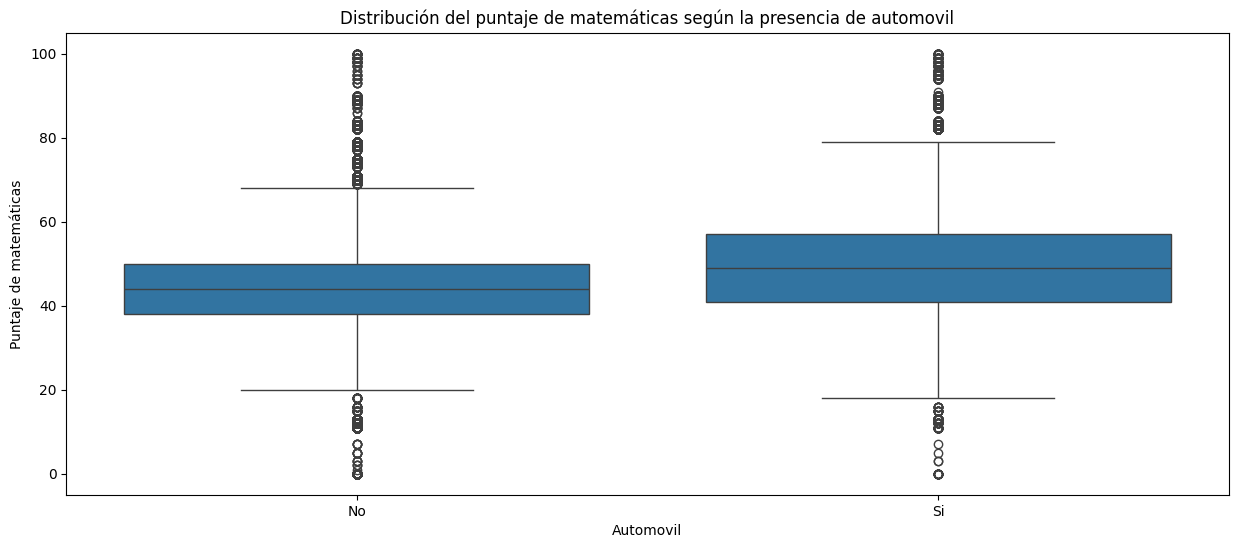

In [268]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='automovil', y='mate', data=df_Mate)
plt.xlabel('Automovil')
plt.ylabel('Puntaje de matemáticas')
plt.title('Distribución del puntaje de matemáticas según la presencia de automovil')
plt.show()

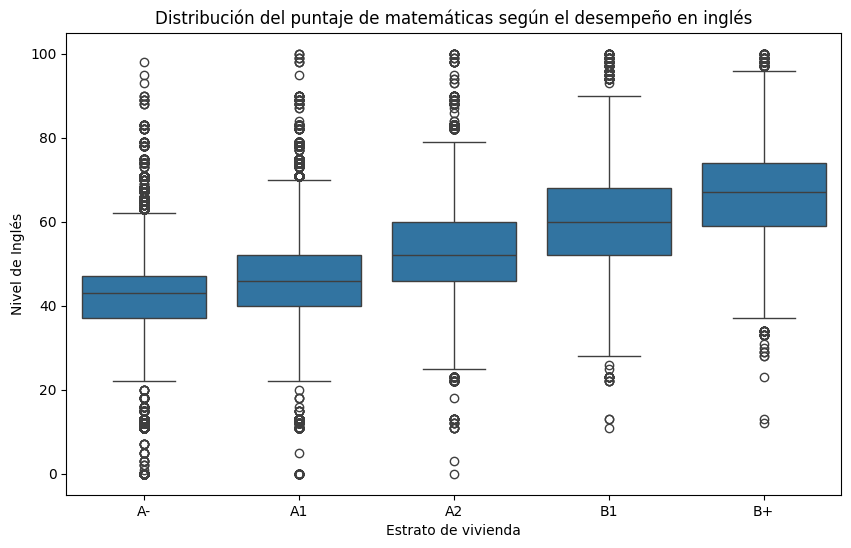

In [231]:
orde_ingles = ["A-", "A1", "A2", "B1", "B+"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='nivelingles', y='mate', data=df_Mate,order= orde_ingles)
plt.xlabel('Estrato de vivienda')
plt.ylabel('Nivel de Inglés')
plt.title('Distribución del puntaje de matemáticas según el desempeño en inglés')
plt.show()

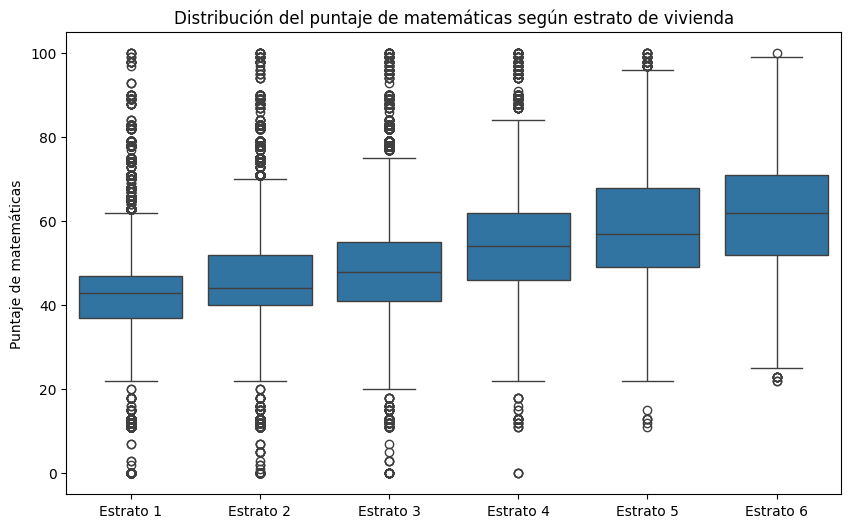

In [233]:
orden_estrato =["Estrato 1","Estrato 2","Estrato 3","Estrato 4", "Estrato 5", "Estrato 6"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='estrato', y='mate', data=df_Mate, order = orden_estrato)
plt.xlabel('')
plt.ylabel('Puntaje de matemáticas')
plt.title('Distribución del puntaje de matemáticas según estrato de vivienda')
plt.show()

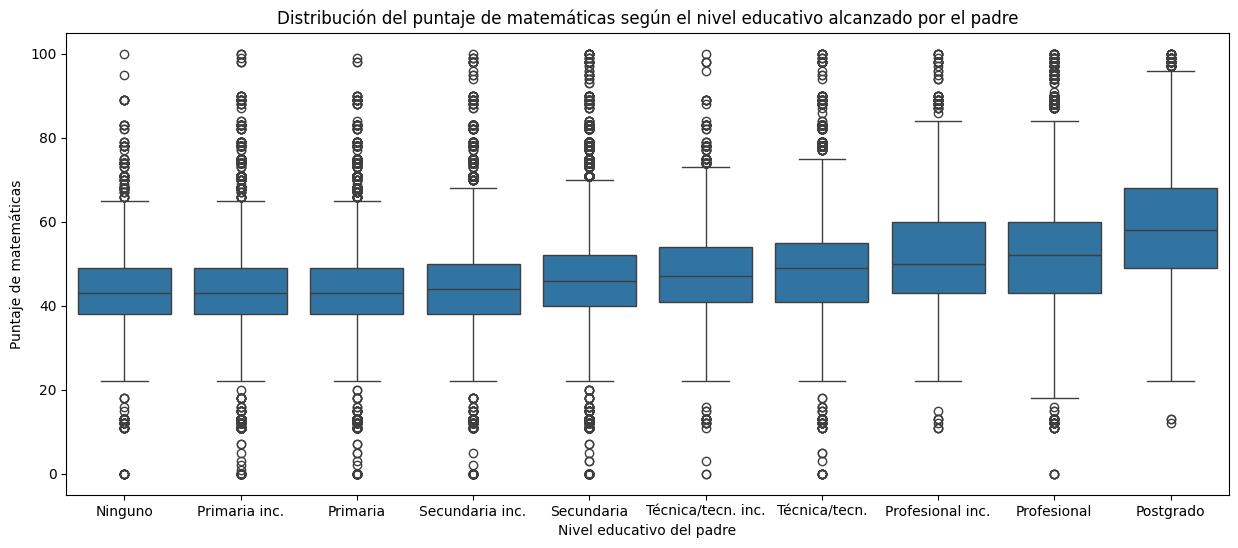

In [234]:
orden_educacion = ['Ninguno','Primaria inc.','Primaria','Secundaria inc.','Secundaria','Técnica/tecn. inc.','Técnica/tecn.','Profesional inc.','Profesional','Postgrado']
plt.figure(figsize=(15, 6))
sns.boxplot(x='edupadre', y='mate', data=df_Mate, order = orden_educacion)
plt.xlabel('Nivel educativo del padre')
plt.ylabel('Puntaje de matemáticas')
plt.title('Distribución del puntaje de matemáticas según el nivel educativo alcanzado por el padre')
plt.show()

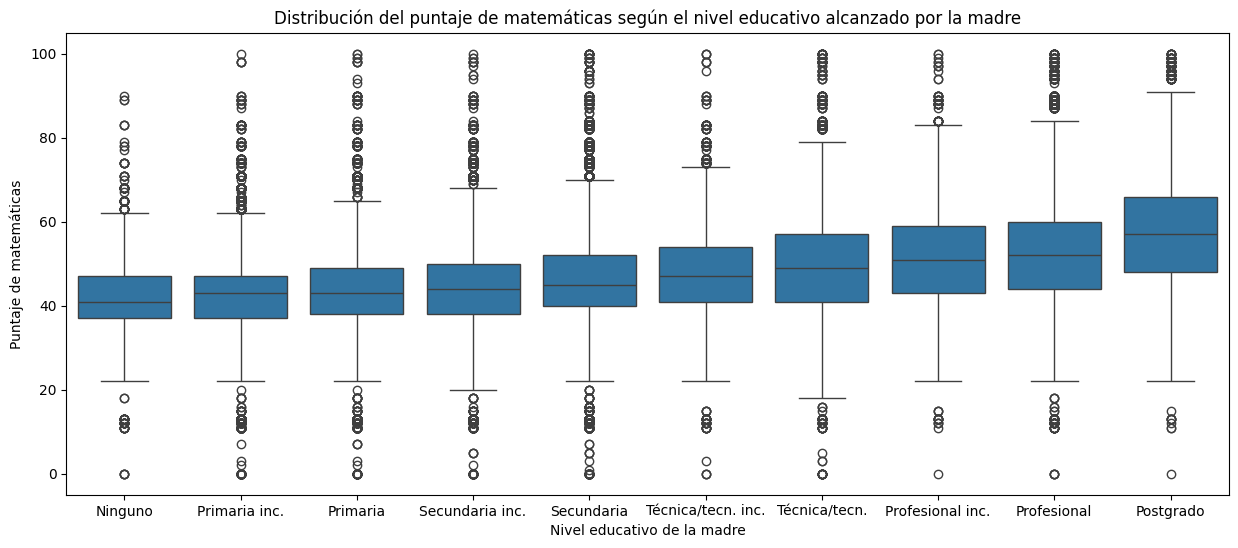

In [235]:
orden_educacion = ['Ninguno','Primaria inc.','Primaria','Secundaria inc.','Secundaria','Técnica/tecn. inc.','Técnica/tecn.','Profesional inc.','Profesional','Postgrado']
plt.figure(figsize=(15, 6))
sns.boxplot(x='edumadre', y='mate', data=df_Mate, order = orden_educacion)
plt.xlabel('Nivel educativo de la madre')
plt.ylabel('Puntaje de matemáticas')
plt.title('Distribución del puntaje de matemáticas según el nivel educativo alcanzado por la madre')
plt.show()

#### Histogramas

Text(0, 0.5, 'Frecuencia')

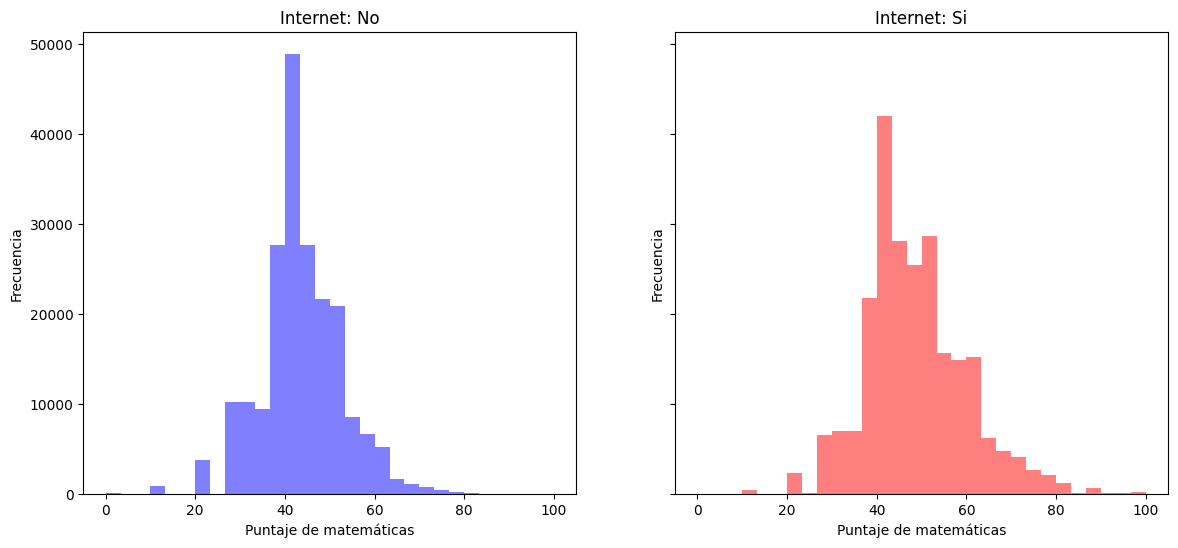

In [272]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].hist(df_Mate[df_Mate["internet"]=="No"]["mate"], bins=30, color='blue', alpha=0.5)
axes[0].set_title('Internet: No')
axes[0].set_xlabel('Puntaje de matemáticas')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_Mate[df_Mate["internet"]=="Si"]["mate"], bins=30, color='red', alpha=0.5)
axes[1].set_title('Internet: Si')
axes[1].set_xlabel('Puntaje de matemáticas')
axes[1].set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

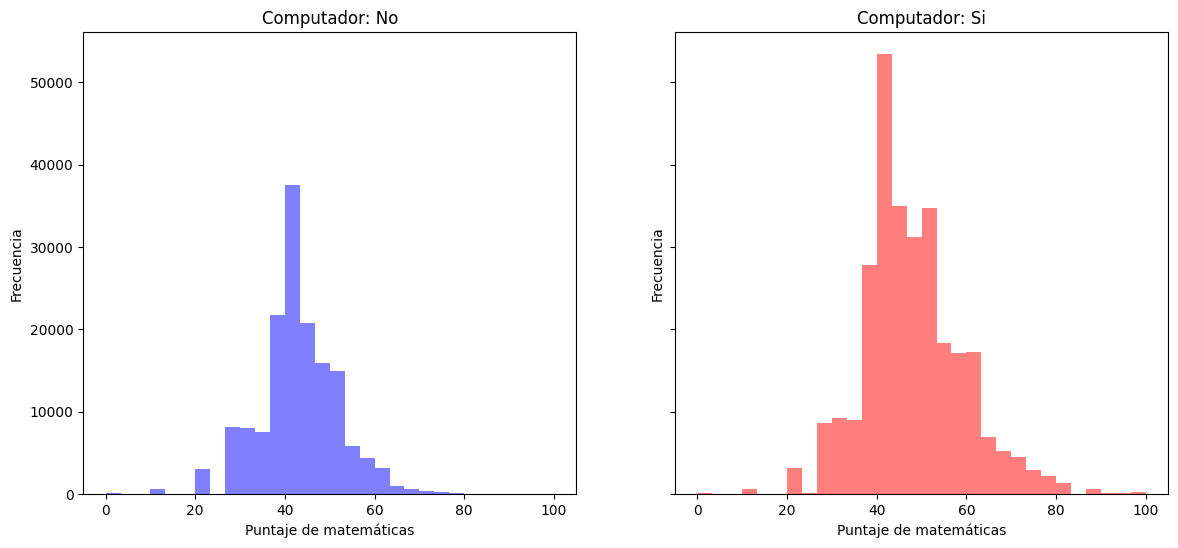

In [271]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].hist(df_Mate[df_Mate["computador"]=="No"]["mate"], bins=30, color='blue', alpha=0.5)
axes[0].set_title('Computador: No')
axes[0].set_xlabel('Puntaje de matemáticas')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_Mate[df_Mate["computador"]=="Si"]["mate"], bins=30, color='red', alpha=0.5)
axes[1].set_title('Computador: Si')
axes[1].set_xlabel('Puntaje de matemáticas')
axes[1].set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

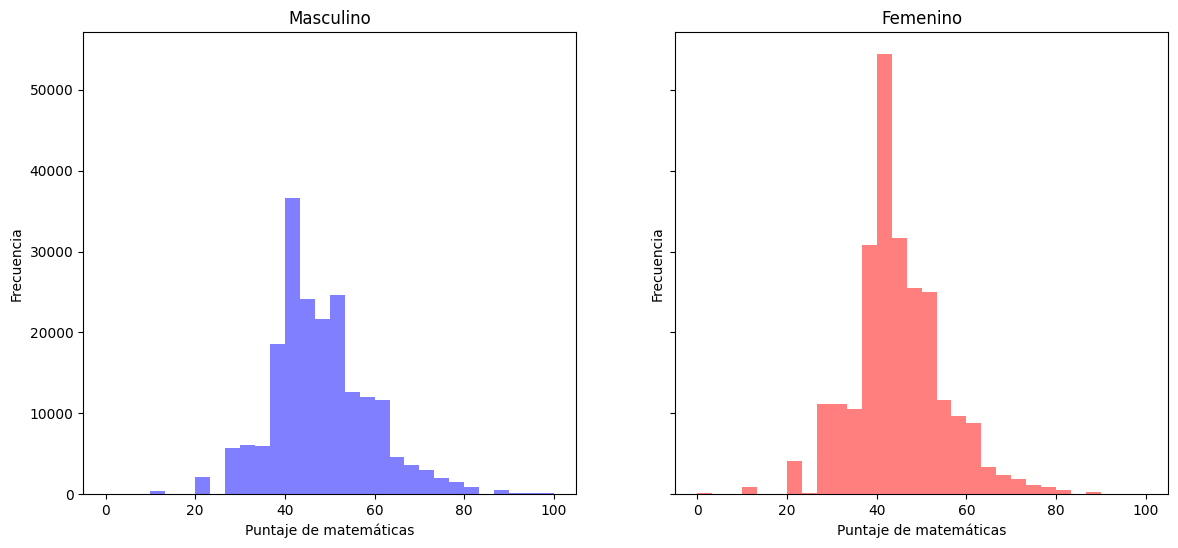

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].hist(df_Mate[df_Mate["sexo"]=="M"]["mate"], bins=30, color='blue', alpha=0.5)
axes[0].set_title('Masculino')
axes[0].set_xlabel('Puntaje de matemáticas')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_Mate[df_Mate["sexo"]=="F"]["mate"], bins=30, color='red', alpha=0.5)
axes[1].set_title('Femenino')
axes[1].set_xlabel('Puntaje de matemáticas')
axes[1].set_ylabel('Frecuencia')

